# 과제 - Bigmart Sales Prediction

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df_test = pd.read_csv('sales_test.csv')
df_train = pd.read_csv('sales_train.csv')

In [76]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [77]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [108]:
type(df_train['Item_Weight'][0])

numpy.float64

- 결측값 채우기

In [78]:
df_train.isnull().sum(), df_test.isnull().sum()

(Item_Identifier                 0
 Item_Weight                  1463
 Item_Fat_Content                0
 Item_Visibility                 0
 Item_Type                       0
 Item_MRP                        0
 Outlet_Identifier               0
 Outlet_Establishment_Year       0
 Outlet_Size                  2410
 Outlet_Location_Type            0
 Outlet_Type                     0
 Item_Outlet_Sales               0
 dtype: int64,
 Item_Identifier                 0
 Item_Weight                   976
 Item_Fat_Content                0
 Item_Visibility                 0
 Item_Type                       0
 Item_MRP                        0
 Outlet_Identifier               0
 Outlet_Establishment_Year       0
 Outlet_Size                  1606
 Outlet_Location_Type            0
 Outlet_Type                     0
 dtype: int64)

In [79]:
df_train['Outlet_Size'].value_counts(), df_train['Item_Weight'].value_counts()

(Medium    2793
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 12.150    86
 17.600    82
 13.650    77
 11.800    76
 15.100    68
           ..
 7.275      2
 7.685      1
 9.420      1
 6.520      1
 5.400      1
 Name: Item_Weight, Length: 415, dtype: int64)

In [80]:
# 매장 크기의 최빈값 구하기
df_train['Outlet_Size'].mode().values[0], round(df_train['Item_Weight'].value_counts().mean(), 2)

('Medium', 17.01)

In [81]:
# 결측치에 매장 크기 최빈값 넣기
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode().values[0], inplace=True)
df_train['Item_Weight'].fillna(round(df_train['Item_Weight'].value_counts().mean(), 2), inplace=True)


df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode().values[0], inplace=True)
df_test['Item_Weight'].fillna(round(df_test['Item_Weight'].value_counts().mean(), 2), inplace=True)


In [82]:
# 결측치 없는지 확인
df_train['Outlet_Size'].isnull().sum(),df_test['Outlet_Size'].isnull().sum(), df_test['Item_Weight'].fillna(round(df_test['Item_Weight'].value_counts().mean(), 2), inplace=True)

(0, 0, None)

In [85]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- 산점도와 선형회귀선

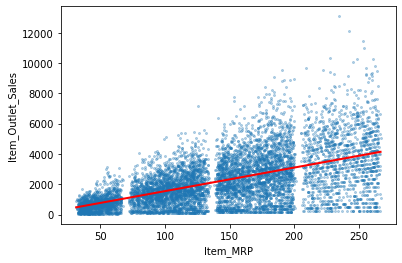

In [95]:
sns.regplot(x='Item_MRP', y='Item_Outlet_Sales', data=df_train, scatter_kws={"alpha":0.3, "s":4}, line_kws={"color":"r","lw":2})
plt.show()

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

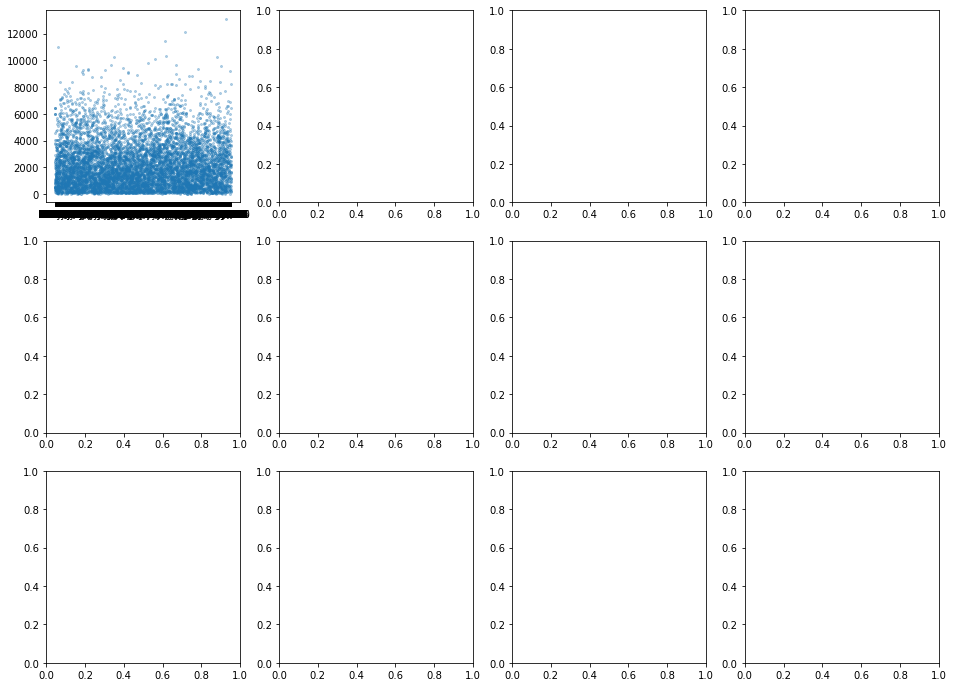

In [104]:
_, axs = plt.subplots(nrows=3, ncols=4, figsize=(16,12))
for i, feature in enumerate(df_train.columns[:-1]):
    row, col = i//4, i&4
    sns.regplot(x=feature, y='Item_Outlet_Sales', data=df_train, ax=axs[row][col], scatter_kws={"alpha":0.3, "s":4}, line_kws={"color":"r","lw":2})